# Two photon emission rate of Rb-87 atom in the free space

This code calculates the two photon emission rates for rubidium-87 atom in the free space. The details of the physics is given in ref. [1]. This code uses lots of the libraries developed by https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/detailed_doc.html [2].

[1]. Generating heralded high-dimensional hyper-entangled photons using Rydberg atoms,...

[2]. N. Sibalic, J.D. Pritchard, C.S. Adams, and K.J.Weatherill, Arc: An open-source library for calculating properties of alkali rydberg atoms, Computer Physics Communications 220, 319-331 (2017).

In this file, we have calculated the TPE rates of Rb atom without cavity. We have not added the contribution of continuum states in this calculation because we found that for Rb atoms the contribution of continuum states are negligible. Detail explanation is given in ref.[1]

The TPE rate for rubidium atom in the free space is given as:
\begin{align}
\Gamma   &= \frac{3^2 Z^{10}}{2^{11}} R_H \alpha^6 c \Big( \frac{k_{fi}}{k_0}\Big)^5 \int_{y=0}^{1} y^3 (1-y)^3 dy  \Big| \sum_m d_{fm}d_{mi} \Big( \frac{1}{y - y_{im}} + \frac{1}{1 - y - y_{im}} \Big) \Big|^2
\end{align}

Please check the Appendix B of ref. [1] for better understanding of the formula above.

In [1]:
#This program is to connect with the library

# Configure the matplotlib graphics library and configure it to show 
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
import sys,os
rootDir = '/home/sutapa/ARC-Alkali-Rydberg-Calculator-2.0.5/' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
sys.path.insert(0,rootDir)

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

The two photon rate calculation for Rb Rydberg state 

0.5902315400547904


<Figure size 432x288 with 0 Axes>

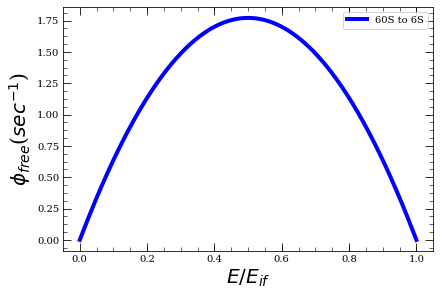

In [10]:
from scipy.special import assoc_laguerre
from scipy.special import factorial
from scipy import integrate
import array as arr
import matplotlib.pyplot as plt

#This function calculates the product of the dipole matrix for the transition from (n1,l1,j1) to (m,lm,jm) and the transition from (m,lm,jm) to (n2,l2,j2)

def kappa(n1,l1,n2,l2,m,lm):
    Adip1=atom.getRadialMatrixElement(n2,l2,j2,m,lm,jm)
    Adip2=atom.getRadialMatrixElement(m,lm,jm,n1,l1,j1)
    return(Adip1*Adip2)

def Mnr(y,ym):
    fm= 1/(y+ym)-(1/(y-1-ym))
    return(fm)

# Defining the atoms
atom=Rubidium87()
atom1=Hydrogen()

# Initial state
n1 = 60
l1 = 0
j1=0.5

#final state
n2= 5
l2=0
j2=0.5

#virtual state,m
lm = 1
jm=1.5
  
#Physical parameters
alpha= 1/137.036   #fine structure spliting
c = 2.99792458*pow(10,8)
Rh = 10973731.5685   #Rydberg constant

coefficient=9*pow(alpha,6)*Rh*c/2**10*(abs((atom.getEnergy(n2,l2,j2)-atom.getEnergy(n1,l1,j1))/(atom1.getEnergy(2,0,0.5)-atom1.getEnergy(1,0,0.5))))**5
sumnr=0.0;
y= np.arange(0.00001,1,0.00001)

for m in range(n1,n1+100):
    ym=(atom.getEnergy(m,lm,jm)-atom.getEnergy(n1,l1,j1))/(atom.getEnergy(n1,l1,j1)-atom.getEnergy(n2,l2,j2))
    kap=kappa(n1,l1,n2,l2,m,lm)
    sumnr=sumnr+(Mnr(y,ym)*abs(kap))  

#TPE spectrum
phi= coefficient*pow(y,3)*pow((1-y),3)*(sumnr*sumnr)

#TPE rates
Anr=0.5*integrate.simps(phi,y)
print(Anr)

#Plot
plt.figure(1)
fig, axs = plt.subplots(1, 1, constrained_layout=True)
plt.plot(y,phi, color='blue', linewidth=4,label='60S to 6S')
plt.legend(loc="upper right")
plt.ylabel('$ϕ_{free}$($sec^{-1}$)', fontsize = 20)
plt.xlabel('$E/E_{if}$', fontsize = 20)
#plt.title('Rb-atom, 60S -> 6S', fontsize = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)


#np.savetxt('phi_free_60D_6S.csv', phi)  
#np.savetxt('y_free_60D_6S.csv',y) 

#plt.savefig('phi_free_60S.pdf',dpi=100)